In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import tensorflow as tf
from matplotlib import pyplot
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.regularizers
import tensorflow.keras.optimizers
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [2]:
file = os.listdir('./UTKFace')
fldr = './UTKFace'
ages = []
genders = []
images = []

for fle in file:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    print(total)

    image = cv.imread(total)
    if image is None:
        print(f"Error: Unable to load image from {total}. Skipping...")
        continue
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    image = cv.resize(image, (128,128), interpolation=cv.INTER_CUBIC)

    images.append(image)#list of images


./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [3]:

for fle in file:

    age=int(fle.split('_')[0])

    gender=int(fle.split('_')[1])

    ages.append(age)#list of ages

    genders.append(gender)#list of genders

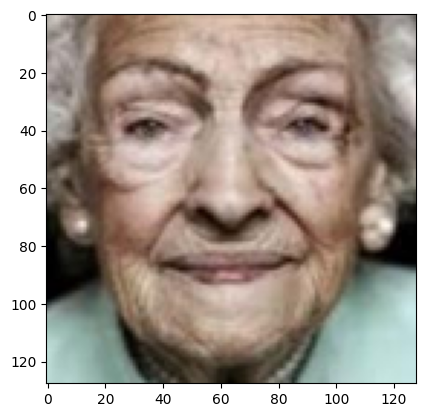

In [4]:
plt.imshow(images[7])

In [5]:
ages[7]

100

In [6]:
genders[7]

1

In [7]:
arrImg=np.array(images)
arrGen=np.array(genders)
arrAge=np.array(ages)

In [8]:
np.save('image.npy',arrImg)
np.save('gen.npy',arrGen)
np.save('age.npy',arrAge)

In [9]:
lyst=[]
i=0
while i<len(images):
    lists=[]
    lists.append(ages[i])
    lists.append(genders[i])
    lyst.append(lists)
    i=i+1



In [10]:
arrImg.shape

(23708, 128, 128, 3)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(images,lyst,test_size=0.2,random_state=42)

In [13]:
ytrain=np.array(ytrain)



In [14]:
ytest=np.array(ytest)


In [15]:
##Diff from vid from split to this point##

In [16]:
def Convolution(input_tensor, filters):

    x=Conv2D(filters=filters, kernel_size=(3,3), padding="sane", strides=(1,1), kernel_regularizer=12(0.001)) (input_tensor)

    x=Dropout(0.1)(x)

    x=Activation('relu')(x)
    return x

<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\SARTHAK\AppData\Local\Temp\ipykernel_9424\308077809.py:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  x=Conv2D(filters=filters, kernel_size=(3,3), padding="sane", strides=(1,1), kernel_regularizer=12(0.001)) (input_tensor)


In [33]:
def model(input_shape):
    inputs = Input(shape=input_shape)

    # First Convolutional Block
    conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    # Second Convolutional Block
    conv_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    # Third Convolutional Block
    conv_3 = Conv2D(128, (3, 3), activation='relu', padding='same')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

    # Fourth Convolutional Block
    conv_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

    # Flattening Layer
    flatten = Flatten()(maxp_4)

    # Shared Dense Layer
    dense_shared = Dense(64, activation='relu')(flatten)

    # Dropout Layer
    drop_shared = Dropout(0.2)(dense_shared)

    # Output Layers
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_shared)  # Sex output (binary)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_shared)    # Age output (regression)
    
    # Model Definition
    model = Model(inputs=[inputs], outputs=[output_1, output_2])

    # Compile the Model
    
    model.compile(
    loss=["binary_crossentropy", "mae"],  # Losses for sex and age
    optimizer="Adam",
    metrics=[["accuracy"], ["mae"]]  # Metrics for sex and age outputs
)

    return model

In [34]:
# Corrected call
input_shape = (128,128, 3)
my_model = model(input_shape)

# Check the model summary
my_model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    295,168 │ max_pooling2d_6[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 256) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16384)     │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │  1,048,640 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sex_out (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,437,186 (5.48 MB)

 Trainable params: 1,437,186 (5.48 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [36]:
fle_s = 'Age_Sex_Detection.keras'#differnt extention

checkpoint=ModelCheckpoint(fle_s,monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=False,mode='auto', save_freq='epoch')

Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor ='val_loss', restore_best_weights=True)

callback_list=[checkpoint,Early_stop]

In [37]:


xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [38]:
ytrain[0]

array([25,  0])

In [39]:
ytrain_age = [ytrain[i][0] for i in range(len(xtrain))]
ytrain_sex = [ytrain[i][1] for i in range(len(xtrain))]



In [40]:
len(ytrain_sex)

18966

In [41]:
len(ytrain_age)

18966

In [42]:
ytrain_sex = np.array(ytrain_sex)
ytrain_age = np.array(ytrain_age)


In [44]:
my_model.fit(xtrain, (ytrain_sex, ytrain_age),batch_size=64,validation_data=(xtrain, (ytrain_sex, ytrain_age)),epochs=400,callbacks=callback_list)


Epoch 1/400
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - age_out_mae: 11.7024 - loss: 12.3048 - sex_out_accuracy: 0.6978
Epoch 1: val_loss improved from inf to 11.37874, saving model to Age_Sex_Detection.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 82s 276ms/step - age_out_mae: 11.7015 - loss: 12.3038 - sex_out_accuracy: 0.6978 - val_age_out_mae: 10.8579 - val_loss: 11.3787 - val_sex_out_accuracy: 0.7677
Epoch 2/400
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - age_out_mae: 10.8756 - loss: 11.4687 - sex_out_accuracy: 0.6920
Epoch 2: val_loss improved from 11.37874 to 9.13186, saving model to Age_Sex_Detection.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 89s 299ms/step - age_out_mae: 10.8752 - loss: 11.4683 - sex_out_accuracy: 0.6920 - val_age_out_mae: 8.5766 - val_loss: 9.1319 - val_sex_out_accuracy: 0.7721
Epoch 3/400
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - age_out_mae: 10.5599 - loss: 11.1457 - sex_out_accuracy: 0.6949
Epoch 3: val_loss improved from 9.13186 to 8.45727, saving model to Age_Sex_Detec

KeyboardInterrupt: 

18966